In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BMW_Car_Sales_Classification.csv')

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Mileage_Category
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2,3
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754,24915
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN,NaN


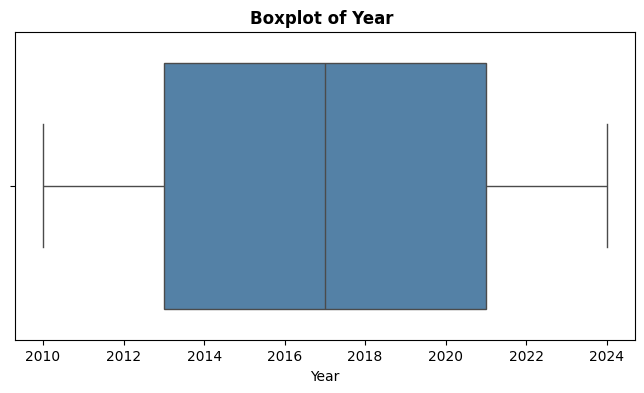

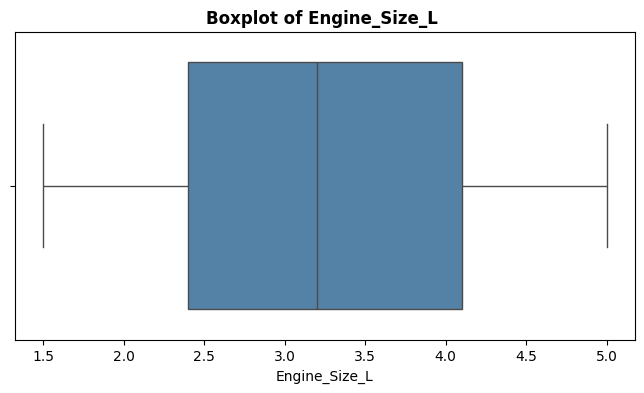

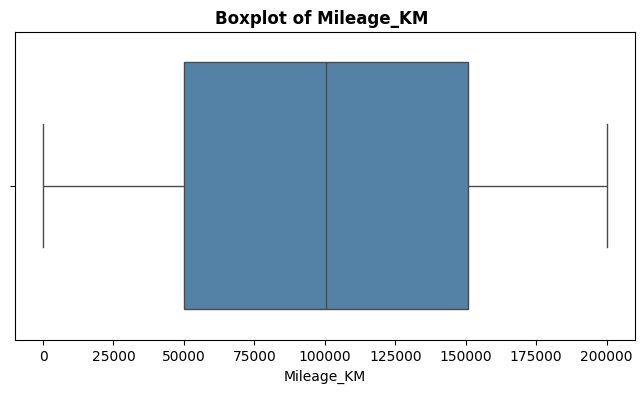

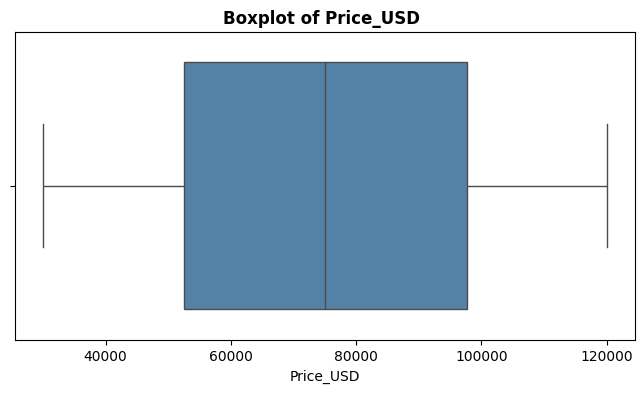

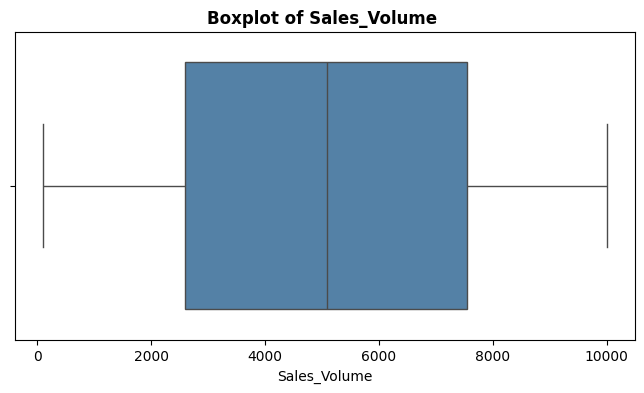

In [ ]:
# Checking Outliers 
numerical_cols = df.select_dtypes(exclude='object')

palette = 'coolwarm' 

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='steelblue')  
    plt.title(f'Boxplot of {col} ', fontsize=12, fontweight='bold')
    plt.show()


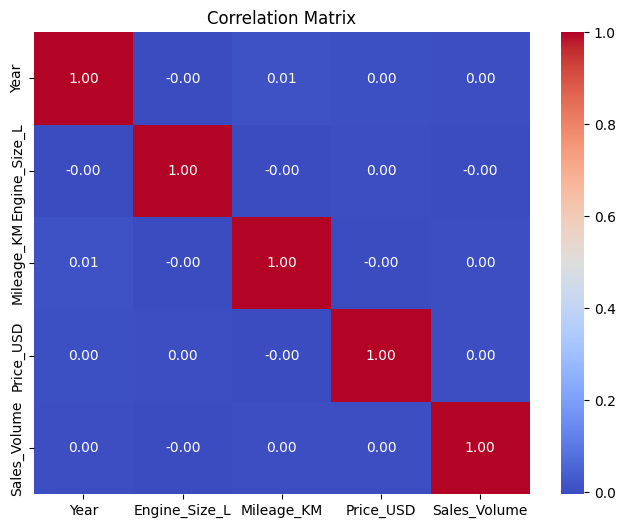

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Key insight: AI Generated Data 

In [9]:
cat = df.select_dtypes(include='object')

for i in cat:
    display(df[i].value_counts())

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64

Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64

Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64

# **📊 Exploratory Analysis**

## 7 Main Charts 
--------------------------------------------

## 1. Yearly Sales Trend Over Time 

### This visualization shows how total yearly sales change over time.
- The sales values are aggregated by year and plotted using a **line chart** with markers to highlight individual data points.

- To improve readability, each point is labeled with a human-friendly **formatted value** (e.g., 12.5K, 830K, 2.1M) instead of long numbers.
- This makes the chart clearer and more suitable for business reports and dashboards.

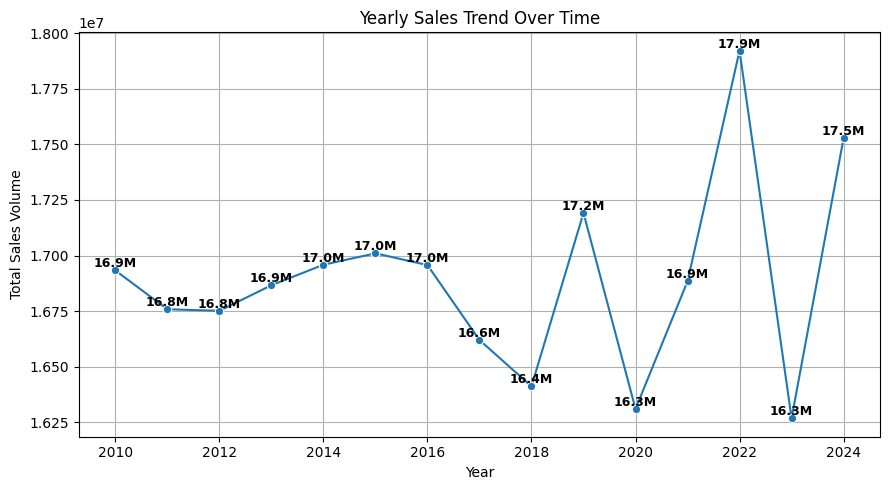

In [20]:

# Function to convert numbers to M format
def format_number(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.1f}K"
    else:
        return str(n)

# Aggregate yearly
yearly_sales = df.groupby('Year')['Sales_Volume'].sum().reset_index()


plt.figure(figsize=(9,5))
sns.lineplot(data=yearly_sales, x='Year', y='Sales_Volume', marker='o')

# Add rounded data labels
for i in range(len(yearly_sales)):
    year = yearly_sales['Year'][i]
    value = yearly_sales['Sales_Volume'][i]
    plt.text(year, value, format_number(value), 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Yearly Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Key Insights from Yearly Sales Trend

- Sales remained stable overall, mostly ranging between **16.3M and 17.9M**.
- **Peak year:** 2022 with **17.9M**, showing the strongest performance.
- **Lowest years:** 2020 and 2023 with **16.3M**, indicating significant dips.
- Post-2020 shows **high volatility** with sharp rises and falls.
- 2012–2016 shows **steady growth**, followed by a decline reaching 2018.
- 2019 marks a **strong recovery** before dropping again in 2020.
----------------------

## 2. Top 10 Best-Selling Car Models (All-Time Cumulative Sales)

- This chart ranks the top 10 car models by total units sold across all years in the dataset.
- Sales volumes are shown in millions (M) and displayed at the end of each bar for quick reference.
- Bars are sorted in descending order and color-coded with a green gradient (darker = higher sales) to instantly highlight performance differences.
- The visualization helps identify which models have historically dominated the market and how close the competition is among premium-segment leaders.

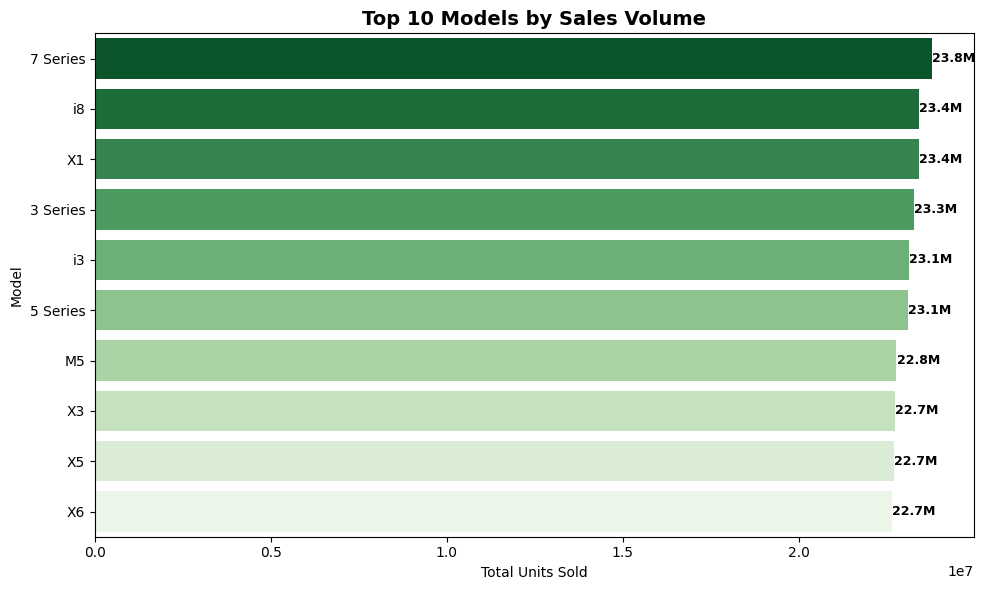

In [ ]:
# Aggregate top 10 sales
top_sales = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10).reset_index()

# Format numbers for labels
def format_number(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.1f}K"
    else:
        return str(n)

plt.figure(figsize=(10,6))

sns.barplot(
    data=top_sales,
    y='Model',
    x='Sales_Volume',
    hue='Model',
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Add data labels
for index, row in top_sales.iterrows():
    plt.text(
        row['Sales_Volume'] + 50,  # small offset to the right of the bar
        index,
        format_number(row['Sales_Volume']),
        va='center',
        fontsize=9,
        fontweight='bold'
    )

plt.title("Top 10 Models by Sales Volume", fontsize=14, fontweight='bold')
plt.xlabel("Total Units Sold")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

## Key Insights

- **BMW 7 Series** is the clear sales leader with **23.8 million** units sold, outperforming every other model in the top 10.
- **i8**, **BMW X1**, and **BMW 3 Series** are in a very tight race for 2nd to 4th place:
  - i8 & X1: **23.4 million** each
  - 3 Series: **23.3 million** (only ~100K–150K units behind)
- The **BMW i3** and **5 Series** tie at **23.1 million** units.
- Sales drop noticeably after the top 6:
  - **M5**: 22.8 M  
  - **BMW X3** & **X5**: 22.7 M each  
  - **BMW X6** (10th place): still a strong 22.7 M, only ~1.1 M units behind the leader.
  ---------------------

## 3. Sales Distribution by Region

- This chart displays the percentage share of total car sales across major global regions.
- Each slice is labeled with its exact percentage for immediate readability.
- The visualization reveals how evenly (or unevenly) the market is distributed geographically.

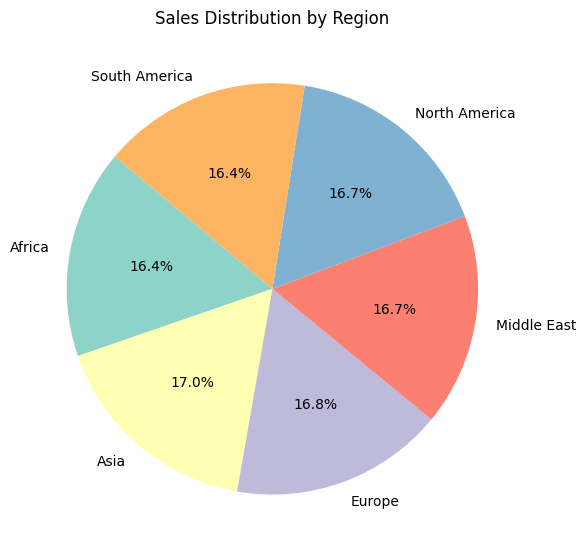

In [21]:

# Aggregate sales by Region
sales_by_region = df.groupby('Region')['Sales_Volume'].sum()

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_region,
    labels=sales_by_region.index,
    autopct='%1.1f%%',       # عرض النسب %
    startangle=140,          # زاوية البداية
    colors=plt.cm.Set3.colors # ألوان جاهزة من ماتplotlib
)

plt.title("Sales Distribution by Region")
plt.tight_layout()
plt.show()


## Key Insights
- The global sales distribution is **remarkably balanced** — the difference between the largest (Asia, 17.0 %) and the smallest (Africa & South America, 16.4 %) region is only **0.6 percentage points**.
- The top 4 regions (Asia, Europe, North America, Middle East) each capture **~16.7–17.0 %** of total sales, collectively accounting for roughly **67 %** of the global market.
- No single region dominates; every major region contributes almost equally. This suggests a truly global customer base with very consistent demand worldwide.
------------------------------------

## 4. Average Price by Model

- This chart shows the average transaction price (in USD) for each car model in the dataset.
- Models are ordered from highest to lowest average price.
- A green gradient is applied (darker = more expensive) for quick visual hierarchy.
- Exact average price values are displayed on top of each bar for precision.

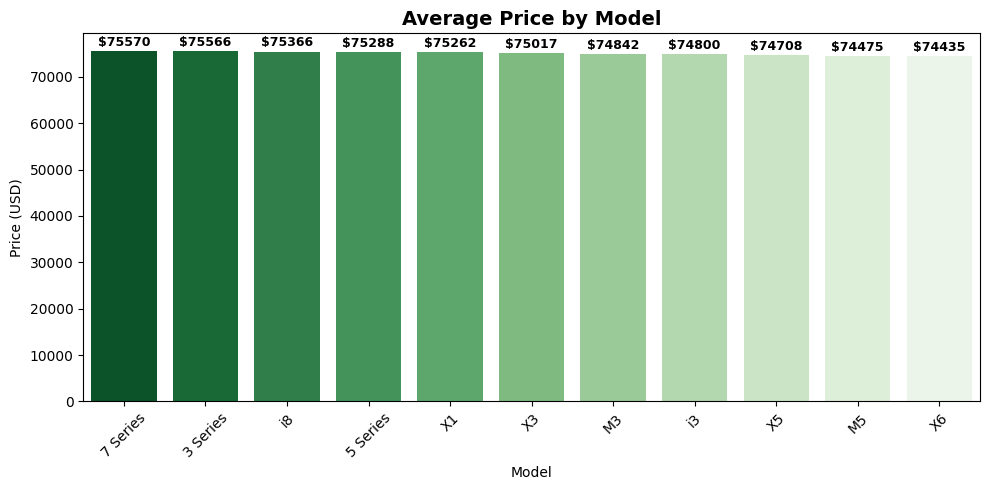

In [13]:
avg_price_model = df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))

# Use hue to avoid future warning
sns.barplot(
    data=avg_price_model,
    x='Model',
    y='Price_USD',
    hue='Model',
    palette='Greens_r',
    dodge=False,
    legend=False
)

# Add data labels on top of bars
for index, row in avg_price_model.iterrows():
    plt.text(
        index, 
        row['Price_USD'] + 500,  # Slightly above the bar
        f"${row['Price_USD']:.0f}",  # Format as integer with $ sign
        ha='center', 
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title("Average Price by Model", fontsize=14, fontweight='bold')
plt.ylabel("Price (USD)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key insights
- Pricing is **extremely consistent** across all models: the difference between the most expensive (7 Series: $75,570) and the least expensive (X6: $74,435) is only **$1,135** (~1.5%).
- The top 6 most expensive models all exceed **$75,000** on average.
- BMW 7 Series and 3 Series command the highest average transaction prices — despite the 7 Series being a full-size luxury flagship and the 3 Series an entry-level premium sedan.
- All 11 models fall within a very narrow **$74.4K – $75.6K** price band, indicating strong brand pricing discipline and consistent positioning in the premium/luxury segment regardless of model type (sedan, SUV, electric, performance).
- Customers pay almost the same regardless of whether they choose a flagship sedan, compact crossover, or high-performance electric model — highlighting exceptional brand equity and perceived value.
----------------------------------

## 5. Average Mileage by Model

- This chart displays the average mileage (in kilometers) accumulated on vehicles at the time of sale/registration for each model.
- Models are sorted from highest to lowest average mileage.
- An orange-to-light gradient is used (darker = higher mileage) for instant visual ranking.
- Exact average values are shown on top of each bar.

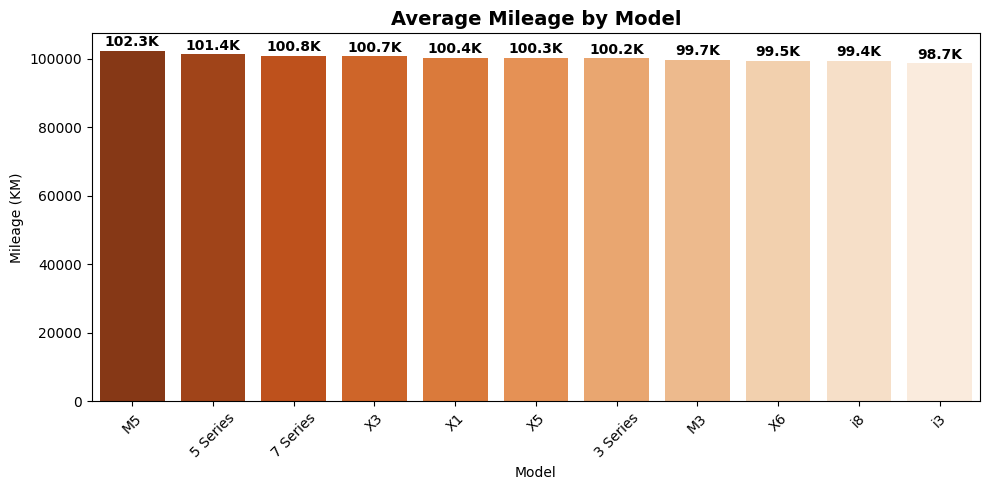

In [14]:
# Compute average mileage per model
avg_mileage = df.groupby('Model')['Mileage_KM'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))

# Barplot with hue to avoid future warning
sns.barplot(
    data=avg_mileage,
    x='Model',
    y='Mileage_KM',
    hue='Model',
    palette='Oranges_r',
    dodge=False,
    legend=False
)

# Function to format numbers in K
def format_k(n):
    if n >= 1_000:
        return f"{n/1_000:.1f}K"
    else:
        return str(n)

# Add data labels above bars
for index, row in avg_mileage.iterrows():
    plt.text(
        index,
        row['Mileage_KM'] + 500,  # slightly above the bar
        format_k(row['Mileage_KM']),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Average Mileage by Model", fontsize=14, fontweight='bold')
plt.ylabel("Mileage (KM)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key insights  
- Average mileage across all models is extremely high and tightly clustered between **98.7K km and 102.3K km** — a spread of only **~3,600 km (3.6%)**.
- Flagship and larger vehicles (M5, 5 Series, 7 Series, X5) tend to have the highest mileage, suggesting they are used more as daily/long-distance drivers.
- Electric/hybrid models (i3 and i8) have the **lowest** average mileage — i3 being the clear lowest at 98.7K km — possibly indicating newer ownership cycles, urban/short-trip usage, or higher retention rates among early adopters.
- Overall, the fleet shows heavy real-world usage: even the “lowest-mileage” model (i3) still averages almost **100,000 km**, underlining exceptional durability and customer confidence in long-term reliability across the entire lineup.
-------------------------------------------

## 6. Average Price by Mileage Category

- This chart shows the average transaction price (USD) across three mileage categories: **Low**, **Mid**, and **High**.
- Categories are ordered logically from lowest to highest accumulated mileage.
- A purple-to-light gradient visually reinforces the mileage progression.

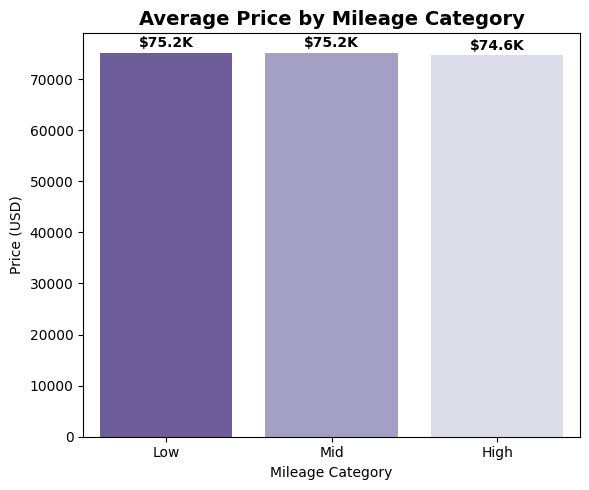

In [ ]:
# Creating Mileage Category
bins = [0, 100000, 150000, df['Mileage_KM'].max()]
labels = ['Low', 'Mid', 'High']
df['Mileage_Category'] = pd.cut(df['Mileage_KM'], bins=bins, labels=labels, include_lowest=True)

# Compute average price per mileage category 
avg_price_mileage = df.groupby('Mileage_Category', observed=False)['Price_USD'].mean().reset_index()
avg_price_mileage['Mileage_Category'] = avg_price_mileage['Mileage_Category'].astype(str)  # ensure string

plt.figure(figsize=(6,5))

sns.barplot(
    data=avg_price_mileage,
    x='Mileage_Category',
    y='Price_USD',
    hue='Mileage_Category',
    palette='Purples_r',
    dodge=False,
    legend=False
)

# Function to format numbers in K
def format_k(n):
    return f"${n/1000:.1f}K"

# Add data labels above bars
for index, row in avg_price_mileage.iterrows():
    plt.text(
        index,
        row['Price_USD'] + 500,  # Slightly above the bar
        format_k(row['Price_USD']),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Average Price by Mileage Category", fontsize=14, fontweight='bold')
plt.ylabel("Price (USD)")
plt.xlabel("Mileage Category")
plt.tight_layout()
plt.show()

In [16]:
df['Mileage_Category'].value_counts()

Mileage_Category
Low     24915
High    12676
Mid     12409
Name: count, dtype: int64

## Key insights 
- Price depreciation with mileage is **extremely mild**: vehicles in the **High-mileage** category still command an average of **$74.6K** — only **~$610 (0.8%)** less than Low-mileage cars.
- Low- and Mid-mileage vehicles have virtually identical average prices (**$75,210 vs $75,200**), indicating almost no discount until mileage enters the High category.
- The largest volume is in the **Low-mileage** segment (24,915 units — roughly 50% of total), confirming strong demand for newer/lightly used examples.
- Overall, these premium models exhibit **exceptional value retention** regardless of mileage, reinforcing the brand’s reputation for durability and desirability even at higher mileage levels.
-----------------------------------

## 7. Average Engine Size by Model

- This chart displays the average engine displacement (in liters) for each model.
- Models are ordered from largest to smallest average engine size.
- A red-to-light gradient is applied (darker = larger engine) for instant visual hierarchy.
- Exact values are labeled on top of each bar.

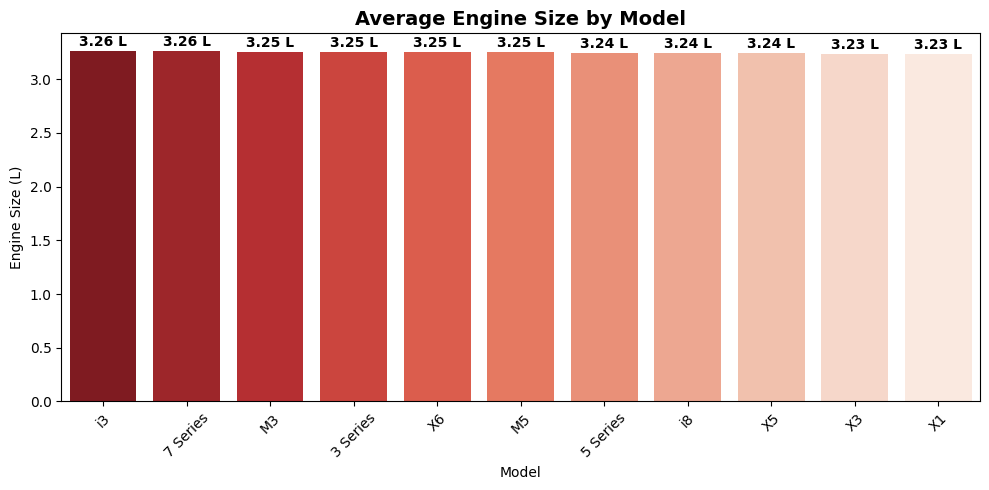

In [17]:
# Compute average engine size per model
avg_engine = df.groupby('Model')['Engine_Size_L'].mean().sort_values(ascending=False).reset_index()
avg_engine['Model'] = avg_engine['Model'].astype(str)  # ensure string type

plt.figure(figsize=(10,5))

# Barplot with palette using hue (warning-free)
sns.barplot(
    data=avg_engine,
    x='Model',
    y='Engine_Size_L',
    hue='Model',
    palette='Reds_r',
    dodge=False,
    legend=False
)

# Add data labels above bars
for index, row in avg_engine.iterrows():
    plt.text(
        index,
        row['Engine_Size_L'] + 0.02,  # slightly above the bar
        f"{row['Engine_Size_L']:.2f} L",  # 2 decimals with L
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Average Engine Size by Model", fontsize=14, fontweight='bold')
plt.ylabel("Engine Size (L)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key insights 
- Engine sizes are **incredibly consistent** across the entire lineup: the difference between the largest (3.26 L) and smallest (3.23 L) average is only **0.03 L (~1%)**.
- Surprisingly, the electric/hybrid-focused **BMW i3** has the highest average engine size (3.26 L) — likely because many are plug-in hybrid variants with range-extender gasoline engines.
- All models cluster tightly between **3.23 L and 3.26 L**, showing strong standardization in powertrain offerings.
- Even compact models like X1 and X3 average over **3.2 L** — confirming the brand’s performance-oriented positioning with no “small” or underpowered entry-level engines.
- The uniformity suggests customers expect and receive a consistent high-performance driving experience regardless of model choice.

------------------------------------------

# END of Exploratory Analysis